# Análisis Exploratorio de Datos (EDA) - User Reviews

### Introducción
El Análisis Exploratorio de Datos (EDA) es una fase crucial en cualquier proyecto de análisis de datos. En esta etapa, se busca identificar patrones, tendencias y relaciones entre las variables que puedan proporcionar información valiosa. En el contexto de nuestro proyecto, nos centraremos en el conjunto de datos llamado `user_reviews_final.csv` (output del notebook ETL_User_Reviews.ipynb), que contiene reseñas de juegos proporcionadas por usuarios. Además, se incluirán datos de otras fuentes `user_items_final.csv` y `steam_games_final.csv`.

### Objetivo
El objetivo principal de este EDA es explorar la estructura y características del conjunto de datos para extraer información relevante que pueda guiar próximos análisis y decisiones. Algunos de los aspectos clave que exploraremos incluyen análisis descriptivo, identificación de valores atípicos (outliers o anomalías), visualizaciones de distribuciones para identificar tendencias, patrones, posibles correlaciones entre factores, entre otros. Estos pasos permitirán obtener una visión detallada y completa de los datos, proporcionando así una base sólida para realizar modelos con Machine Learning.

LIBRERÍAS

In [118]:
#pip install matplotlib
#pip install pandas
#pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt # Librería para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Carga de datos

In [58]:
df1 = pd.read_csv("user_reviews_final.csv")
df1['item_id'] = df1['item_id'].astype(str)
df1 = df1[['user_id', 'item_id', 'recommend', 'year','sentiment_analysis']]

In [50]:
df2 = pd.read_csv("user_items_final.csv")
df2['item_id'] = df2['item_id'].astype(str)

In [109]:
df3 = pd.read_csv("steam_games_final.csv")
df3['item_id'] = df3['item_id'].astype(str)

In [55]:
# Realiza la fusión (merge) basada en 'user_id' e 'item_id'
df_user_reviews_hours= pd.merge(df1, df2[['user_id', 'item_id', 'Hours_played']], on=['user_id', 'item_id'], how='left')
print(df_user_reviews_hours.shape)
df_user_reviews_hours.head()

(45098, 6)


,user_id,item_id,recommend,year,sentiment_analysis,Hours_played
0,76561197970982479,1250,True,2011,2,166.767
1,76561197970982479,22200,True,2011,2,4.517
2,76561197970982479,43110,True,2011,2,13.900
3,js41637,251610,True,2014,2,1.400
4,js41637,227300,True,2013,2,9.183


In [59]:
df = df_user_reviews_hours.copy()

In [112]:
# Realiza la fusión (merge) basada en 'item_id' y 'app_name'
df_user_review_appname = pd.merge(df, df3[['item_id', 'app_name']], on='item_id', how='left')
print(df_user_review_appname.shape)

(45098, 7)


In [60]:
print(df.shape)
df.head()

(45098, 6)


,user_id,item_id,recommend,year,sentiment_analysis,Hours_played
0,76561197970982479,1250,True,2011,2,166.767
1,76561197970982479,22200,True,2011,2,4.517
2,76561197970982479,43110,True,2011,2,13.900
3,js41637,251610,True,2014,2,1.400
4,js41637,227300,True,2013,2,9.183


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45098 entries, 0 to 45097
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             45098 non-null  object 
 1   item_id             45098 non-null  object 
 2   recommend           45098 non-null  bool   
 3   year                45098 non-null  int64  
 4   sentiment_analysis  45098 non-null  int64  
 5   Hours_played        34563 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 1.8+ MB


### 2. Estadística descriptiva

In [62]:
# Summary del dataframe 
df.describe(include ='all') #'all' incluye todas las columnas

,user_id,item_id,recommend,year,sentiment_analysis,Hours_played
count,45098,45098,45098,45098.000000,45098.000000,34563.000000
unique,20418,3429,2,NaN,NaN,NaN
top,flatwhite,730,True,NaN,NaN,NaN
freq,10,2518,39500,NaN,NaN,NaN
mean,NaN,NaN,NaN,2014.188656,1.519868,145.919300
std,NaN,NaN,NaN,0.805426,0.791061,360.362693
min,NaN,NaN,NaN,2010.000000,0.000000,0.017000
25%,NaN,NaN,NaN,2014.000000,1.000000,6.483000
50%,NaN,NaN,NaN,2014.000000,2.000000,24.783000
75%,NaN,NaN,NaN,2015.000000,2.000000,107.167000


Se observa que 5 variables no tienen nulos (count=45098). 
De las variables numéricas, el mínimo valor del año (`year`) en el que fue posteada una reseña es 2010 y el máximo es 2015. Las horas jugadas (`Hours_played`) en promedio es de 145.9 horas y un máximo de 10223.5 horas. 
El valor más frecuente de la variable `recommend` es True (39500).

#### Análisis de cada variable

In [63]:
df['user_id'].nunique() # Cantidad de valores únicos en user_id

20418

In [64]:
df['item_id'].nunique() # Cantidad de valores únicos en item_id

3429

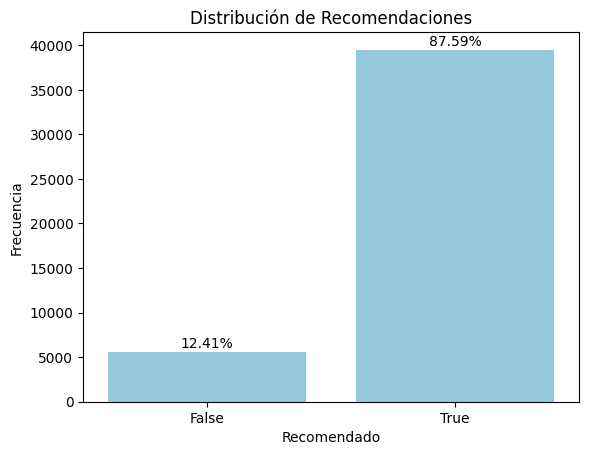

In [74]:
# Gráfico de barras para la distribución de la columna 'recommend'
g = sns.countplot(x='recommend', data=df, color =  'skyblue')

# Calcular porcentajes
total_entries = len(df)
percentage_data = (df['recommend'].value_counts() / total_entries) * 100
# Agregar etiquetas de porcentaje en la parte superior de cada barra
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height / total_entries * 100:.2f}%', # porcentaje de las barras
                xy=(p.get_x() + p.get_width() / 2, height), #ubica en el centro superior de cada barra
                xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendado')
plt.ylabel('Frecuencia')
plt.show()

Claramente se observa un desbalance estre los datos True y False. Las reseñas con recomendación marcadas como True representa el 88% de los datos mientras que los marcados como False solo el 12%. 

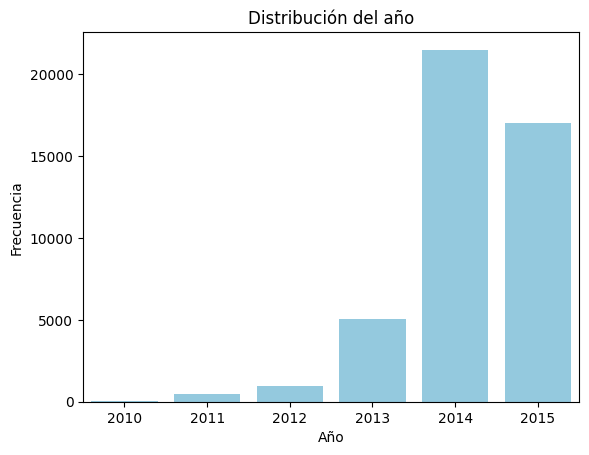

In [66]:
# Gráfico de barras para la distribución de la columna 'year'
sns.countplot(x='year', data=df, color =  'skyblue')
plt.title('Distribución del año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

Este gráfico indica la cantidad de reseñas por año, aparentemente hay una tendencia positiva que incrementa en años recientes. Además, se tiene un pico en el año 2014, sería interesante averiguar por qué en el ese año se tuvo más reseñas y si está vinculado con el lanzamiento de más juegos para esos años u otra causa.

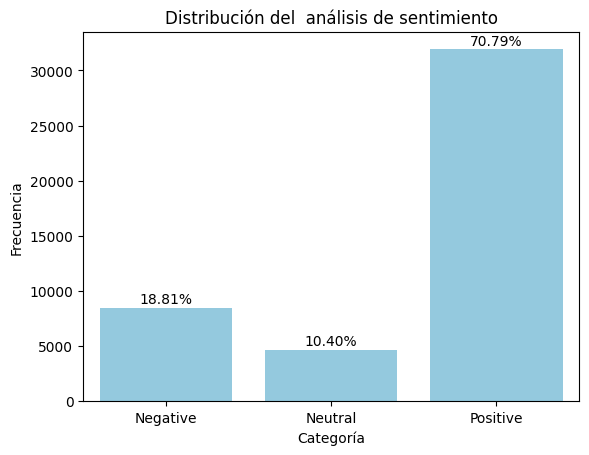

In [81]:
# Gráfico de barras para la distribución de la columna 'sentiment_analysis'
g = sns.countplot(x='sentiment_analysis', data=df, color =  'skyblue')

# Calcular porcentajes
total_entries = len(df)
percentage_data = (df['sentiment_analysis'].value_counts() / total_entries) * 100
# Agregar etiquetas de porcentaje en la parte superior de cada barra
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height / total_entries * 100:.2f}%', # porcentaje de las barras
                xy=(p.get_x() + p.get_width() / 2, height), #ubica en el centro superior de cada barra
                xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])

plt.title('Distribución del  análisis de sentimiento')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

Concuerda con lo observado en el gráfico de la variabe recommend en el que True (88%) representaba el mayor porcentaje de los datos. Aquí los valores se distribuyen en su mayoría como comentarios Positivos por lo que tiene sentido que sean calificados como *recomendado* sin embargo, hay comentarios neutrales y negativos.

A continuación, se hace un boxplot para la variable `Hours_played` que muestra una distribución cuantitativa de los datos.

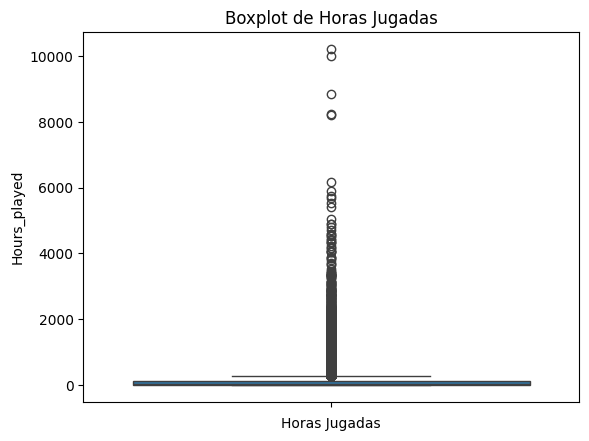

In [69]:
# Crea un boxplot de la variable 'Hours_played'
sns.boxplot(y='Hours_played', data=df)

# Personalizar el gráfico
plt.title('Boxplot de Horas Jugadas')
plt.xlabel('Horas Jugadas')

# Mostrar el gráfico
plt.show()

La variable `Hours_played` tiene mucha dispersión de los datos y se visualiza como outliers en el boxplot. Esto puede ser indicador que se cuentan con distintos perfiles de usuarios y/o por la influencia de juegos que tienen características que ciertos usuarios valoran más. La mayoría de los valores se concentran entre valores menores a 200 horas. A continuación se grafica su distribución considerando horas menores a 200.

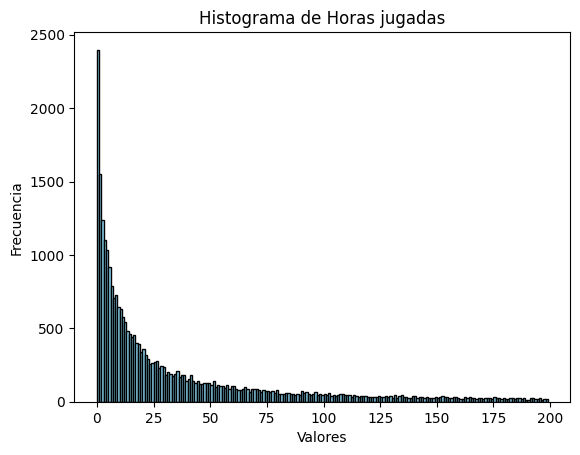

In [127]:
#max_value = int(df['Hours_played'].max())

# Crear un histograma 
plt.hist(df['Hours_played'], bins=range(0, 200), color='skyblue', edgecolor='black')

# Personalizar el histograma
plt.title('Histograma de Horas jugadas')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

* Se puede apreciar a simple vista una asimetría positiva

#### Análisis entre variables

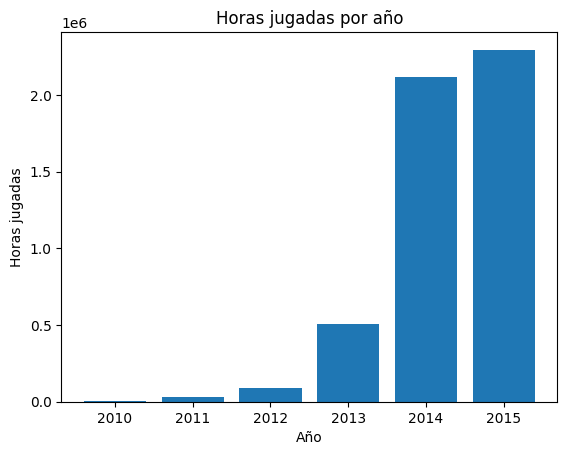

In [171]:
# Horas jugadas por año
hours_by_year = df.groupby('year')['Hours_played'].sum()
plt.bar(hours_by_year.index, hours_by_year)
plt.xlabel('Año')
plt.ylabel('Horas jugadas')
plt.title('Horas jugadas por año')
plt.show()

La cantidad de horas jugadas aumenta a medida que aumentan los años, veamos si la cantidad de juegos disponibles aumentan también en esos años.

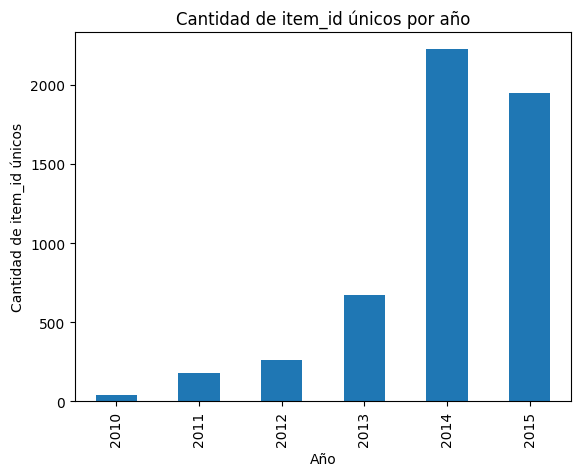

In [139]:
# Contar la cantidad de item_id únicos por año
unique_items_by_year = df.groupby('year')['item_id'].nunique()

# Crear el gráfico de barras
unique_items_by_year.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Cantidad de item_id únicos')
plt.title('Cantidad de item_id únicos por año')
plt.show()

De la gráfica podemos inferir que a pesar que el año 2014 tiene más juegos disponibles, la cantidad de horas jugadas no fue mucho a comparación del 2014 en el que se tiene una menor cantidad de juegos disponibles y las horas jugadas es mayor. Esto puede ser porque la cantidad de usuarios fue mayor en el 2015 o porque los usuarios jugaron más por x razones.

In [173]:
# Contar la cantidad de user_id únicos por año
pivot_table_reviews_by_year = pd.pivot_table(df_user_review_appname, values='user_id', index='year', aggfunc='count')
pivot_table_reviews_by_year

,user_id
year,
2010,58
2011,446
2012,945
2013,5085
2014,21511
2015,17053


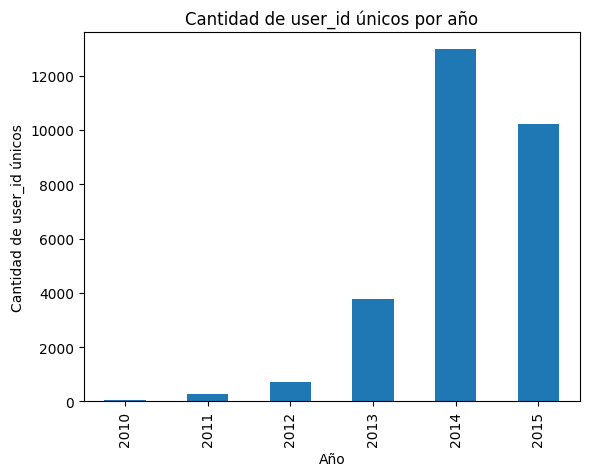

In [142]:
# Contar la cantidad de user_id únicos por año
unique_users_by_year = df.groupby('year')['user_id'].nunique()

# Crear el gráfico de barras
unique_users_by_year.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Cantidad de user_id únicos')
plt.title('Cantidad de user_id únicos por año')
plt.show()

En este punto surge la pregunta, qué hizo que los usuarios jueguen más en el 2015 a comparación de los demás años, qué incentivó su mayor consumo?, cambiaron los precios?, se volvió más accesible para usuarios nuevos?, se actualizó/mejoró el juego?, etc.

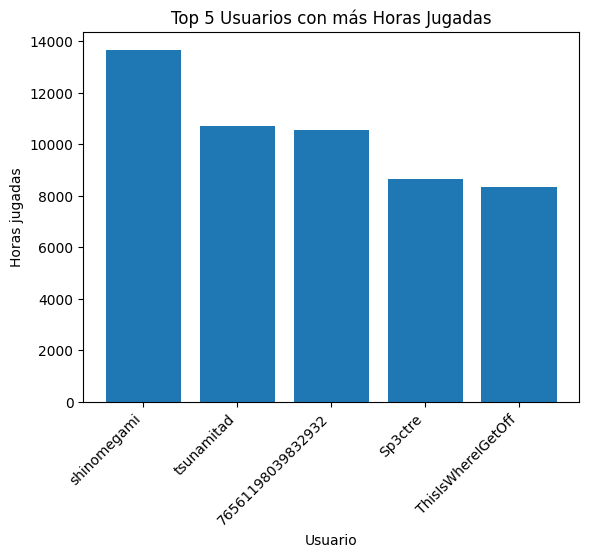

In [103]:
# Horas jugadas por usuario
hours_by_user = df.groupby('user_id')['Hours_played'].sum()
# Seleccionar los 5 usuarios con más horas jugadas
top_5_users = hours_by_user.nlargest(5)

# Crear un gráfico de barras para los 5 usuarios con más horas jugadas
plt.bar(top_5_users.index, top_5_users)
plt.xlabel('Usuario')
plt.ylabel('Horas jugadas')
plt.title('Top 5 Usuarios con más Horas Jugadas')
# Orientar los nombres del eje x a 45 grados
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

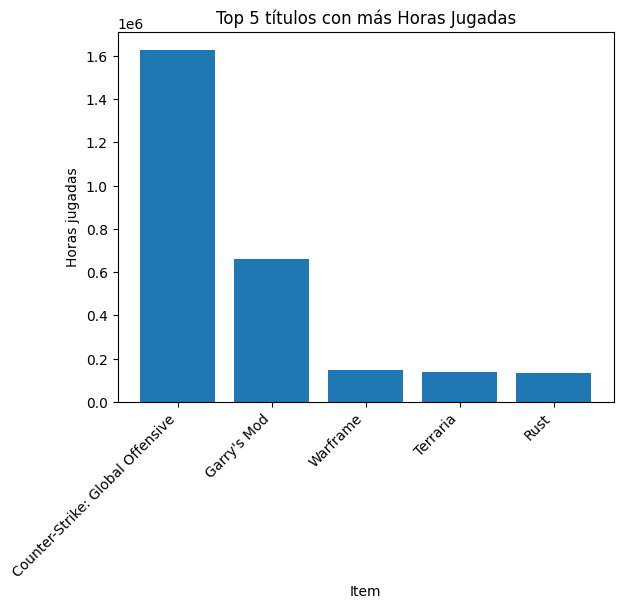

In [115]:
# Horas jugadas por item / app_name
hours_by_user = df_user_review_appname.groupby('app_name')['Hours_played'].sum()
# Seleccionar los 5 app_name con más horas jugadas
top_5_users = hours_by_user.nlargest(5)

# Crear un gráfico de barras para los 5 app_name con más horas jugadas
plt.bar(top_5_users.index, top_5_users)
plt.xlabel('Item')
plt.ylabel('Horas jugadas')
plt.title('Top 5 títulos con más Horas Jugadas')
# Orientar los nombres del eje x a 45 grados
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

#### NUBE DE PALABRAS

A continuación se muestra una nube de palabras donde se resaltan las palabras más frecuentes en los títulos. Esto nos permite tener una idea de cuáles palabras son las que más se consideran dentro de los títulos de los juegos más consumidos por los usuarios - importante para desarrollar un sistema de predicción en base a similitud de palabras de los títulos-. 

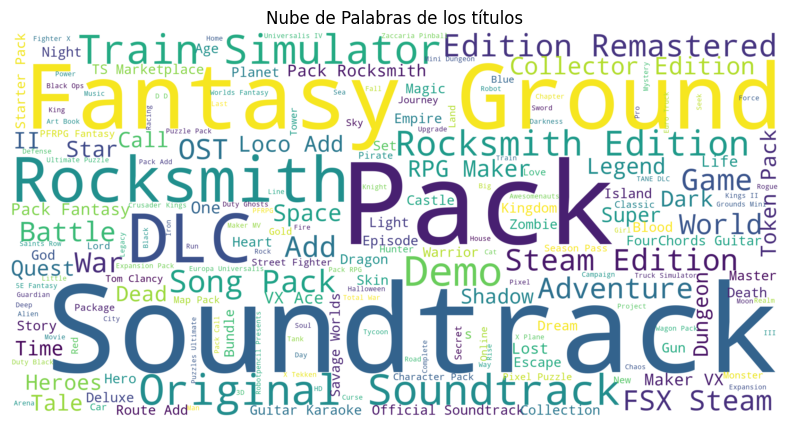

In [123]:
# Palabras más frecuentes en los títulos
# Este código crea una nube de palabras que muestra visualmente las palabras más frecuentes en la columna 'app_name'.

# Concatena todos los títulos de 'app_name' en una cadena
all_app_names = ' '.join(df3['app_name'].astype(str))

# Crea el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', scale = 3).generate(all_app_names) # scale por default es 1, un valor más alto aumenta la importancia de las palabras más frecuentes en la nube lo que no ayuda a diferenciarlos más facilmente 

# Mostrar 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los títulos')
plt.show()

### 3. Correlaciones

Analizamos las correlaciones entre las variables numéricas del dataset

In [157]:
#En este caso, se incluye 'year' en el análisis para ver si hay alguna correlación con otras variables a lo largo del tiempo.
numeric_columns = df_user_review_appname[[ 'year', 'sentiment_analysis', 'Hours_played']]
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                        year  sentiment_analysis  Hours_played
year                1.000000           -0.069990      0.036296
sentiment_analysis -0.069990            1.000000      0.019432
Hours_played        0.036296            0.019432      1.000000


Matriz de correlación (en forma de mapa de calor)

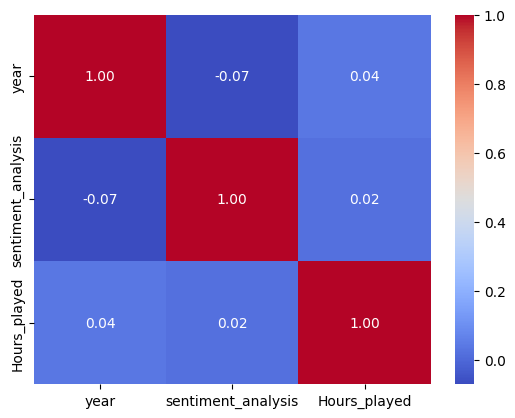

In [163]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* Se observa una correlación muy débil entre las variables. En general, hay una relación positiva muy débil entre 'Hours_played' y 'year'. A medida que aumentan los años, existe una leve tendencia a que las horas jugadas también aumenten, pero la relación no es lo suficientemente fuerte como para hacer predicciones precisas basadas solo en 'year'. La variabilidad en los datos de 'Hours_played' puede afectar la fuerza de la correalación, ya que la correlación es sensible a la presencia de valores extremos.